In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

In [2]:
# importing data
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_19052\1564032878.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [3]:
df.head(4)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"


In [3]:
# removing the space from column names
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [5]:
df.head(2)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique_Key                      364558 non-null  int64  
 1   Created_Date                    364558 non-null  object 
 2   Closed_Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency_Name                     364558 non-null  object 
 5   Complaint_Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location_Type                   364425 non-null  object 
 8   Incident_Zip                    361560 non-null  float64
 9   Incident_Address                312859 non-null  object 
 10  Street_Name                     312859 non-null  object 
 11  Cross_Street_1                  307370 non-null  object 
 12  Cross_Street_2  

In [7]:
df.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

In [8]:
df.shape

(364558, 53)

In [9]:
df.describe()

,Unique_Key,Incident_Zip,X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane),School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Garage_Lot_Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


## Checking null values

In [10]:
# columns containing null values
df.columns[df.isna().any()]

Index(['Closed_Date', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Due_Date',
       'Resolution_Action_Updated_Date', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'School_Region', 'School_Code',
       'School_Zip', 'School_or_Citywide_Complaint', 'Vehicle_Type',
       'Taxi_Company_Borough', 'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Terminal_Name', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
null_cols = df.isna().sum()[df.isna().sum()>0]
null_cols

Closed_Date                         2381
Descriptor                          6501
Location_Type                        133
Incident_Zip                        2998
Incident_Address                   51699
Street_Name                        51699
Cross_Street_1                     57188
Cross_Street_2                     57805
Intersection_Street_1             313438
Intersection_Street_2             314046
Address_Type                        3252
City                                2997
Landmark                          364183
Facility_Type                       2389
Due_Date                               3
Resolution_Action_Updated_Date      2402
X_Coordinate_(State_Plane)          4030
Y_Coordinate_(State_Plane)          4030
School_Region                          1
School_Code                            1
School_Zip                             1
School_or_Citywide_Complaint      364558
Vehicle_Type                      364558
Taxi_Company_Borough              364558
Taxi_Pick_Up_Loc

In [5]:
percentage_null = (null_cols/364558)*100
cols_to_drop = percentage_null[percentage_null>50]
cols_to_drop

Intersection_Street_1            85.977540
Intersection_Street_2            86.144317
Landmark                         99.897136
School_or_Citywide_Complaint    100.000000
Vehicle_Type                    100.000000
Taxi_Company_Borough            100.000000
Taxi_Pick_Up_Location           100.000000
Bridge_Highway_Name              99.918531
Bridge_Highway_Direction         99.918531
Road_Ramp                        99.928132
Bridge_Highway_Segment           99.928132
Garage_Lot_Name                 100.000000
Ferry_Direction                  99.999726
Ferry_Terminal_Name              99.999451
dtype: float64

### Removing calumns where NA values are more than 50%

In [6]:
print(df.shape)
print("--------------------------------------------------------")
df.drop(cols_to_drop.index,axis=1,inplace=True)
print(df.shape)

(364558, 53)
--------------------------------------------------------
(364558, 39)


In [7]:
df.head()

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### redefining null columns

In [8]:
null_cols = df.isna().sum()[df.isna().sum()>0]
null_cols

Closed_Date                        2381
Descriptor                         6501
Location_Type                       133
Incident_Zip                       2998
Incident_Address                  51699
Street_Name                       51699
Cross_Street_1                    57188
Cross_Street_2                    57805
Address_Type                       3252
City                               2997
Facility_Type                      2389
Due_Date                              3
Resolution_Action_Updated_Date     2402
X_Coordinate_(State_Plane)         4030
Y_Coordinate_(State_Plane)         4030
School_Region                         1
School_Code                           1
School_Zip                            1
Latitude                           4030
Longitude                          4030
Location                           4030
dtype: int64

#### Plting null values

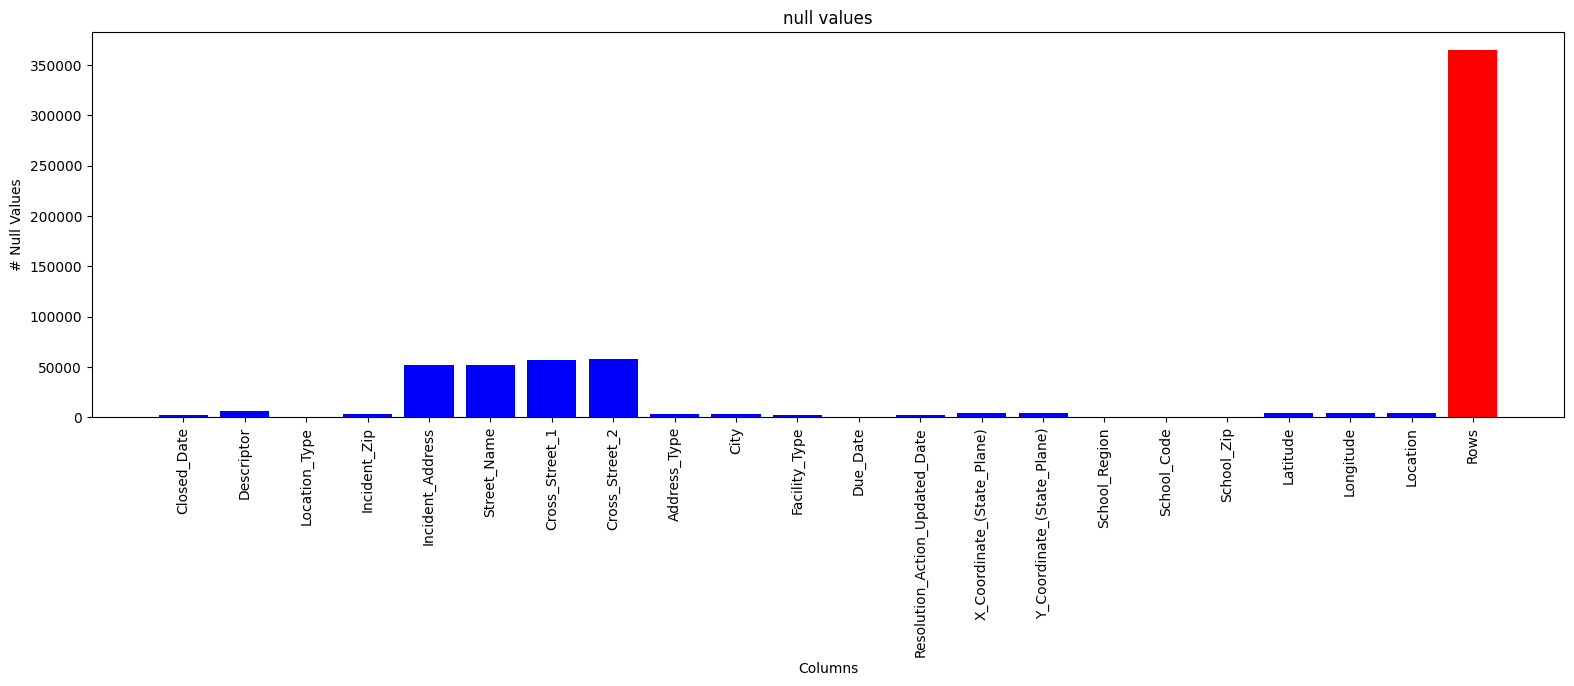

In [9]:
# plotting null values
plt.figure(figsize=(19,5)) 
plt.bar(null_cols.index, null_cols.values, color='blue') # null values
plt.bar("Rows",df.shape[0],color='red') # comparing with df length
plt.title('null values') 
plt.xlabel('Columns')
plt.ylabel('# Null Values')
plt.xticks(rotation=90)
plt.show()

### 2.2.1 Remove the records whose Closed Datevalues are null

In [11]:
print(df.shape)
df_modif = df.dropna(subset="Closed_Date").copy()
print(df_modif.shape)

(364558, 39)
(362177, 39)


In [12]:
df_modif.head(3)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


## 2.3Analyze the date column,and remove entries that have an incorrect timeline

### 2.3.1Calculate the time elapsed in closed and creation date

In [13]:
df_modif['Created_Date'] = pd.to_datetime(df_modif['Created_Date'])
df_modif["Closed_Date"] = pd.to_datetime(df_modif['Closed_Date'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_19052\194501644.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_modif['Created_Date'] = pd.to_datetime(df_modif['Created_Date'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19052\194501644.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_modif["Closed_Date"] = pd.to_datetime(df_modif['Closed_Date'])


In [14]:
time_elapsed = (df_modif['Closed_Date'] - df_modif['Created_Date'])
time_elapsed.head()

0   0 days 00:55:30
1   0 days 01:27:13
2   0 days 04:51:34
3   0 days 07:45:27
4   0 days 03:27:44
dtype: timedelta64[ns]

In [15]:
df_modif['Time_elapsed'] = time_elapsed.dt.total_seconds()

In [16]:
# check negative time 
len(df_modif[df_modif['Time_elapsed']<0])

0

### 2.3.4Check the number of null values in the Complaint_Type and City columns

In [17]:
print(df_modif['Complaint_Type'].isna().sum())
print(df_modif['City'].isna().sum())

0
674


In [18]:
# change the NA values with unknown city
df_modif['City'] = df_modif['City'].fillna('Unknown_City')

In [19]:
# check id replaced
df_modif['City'].loc[df_modif['City'] == 'Unknown_City'].count()

674

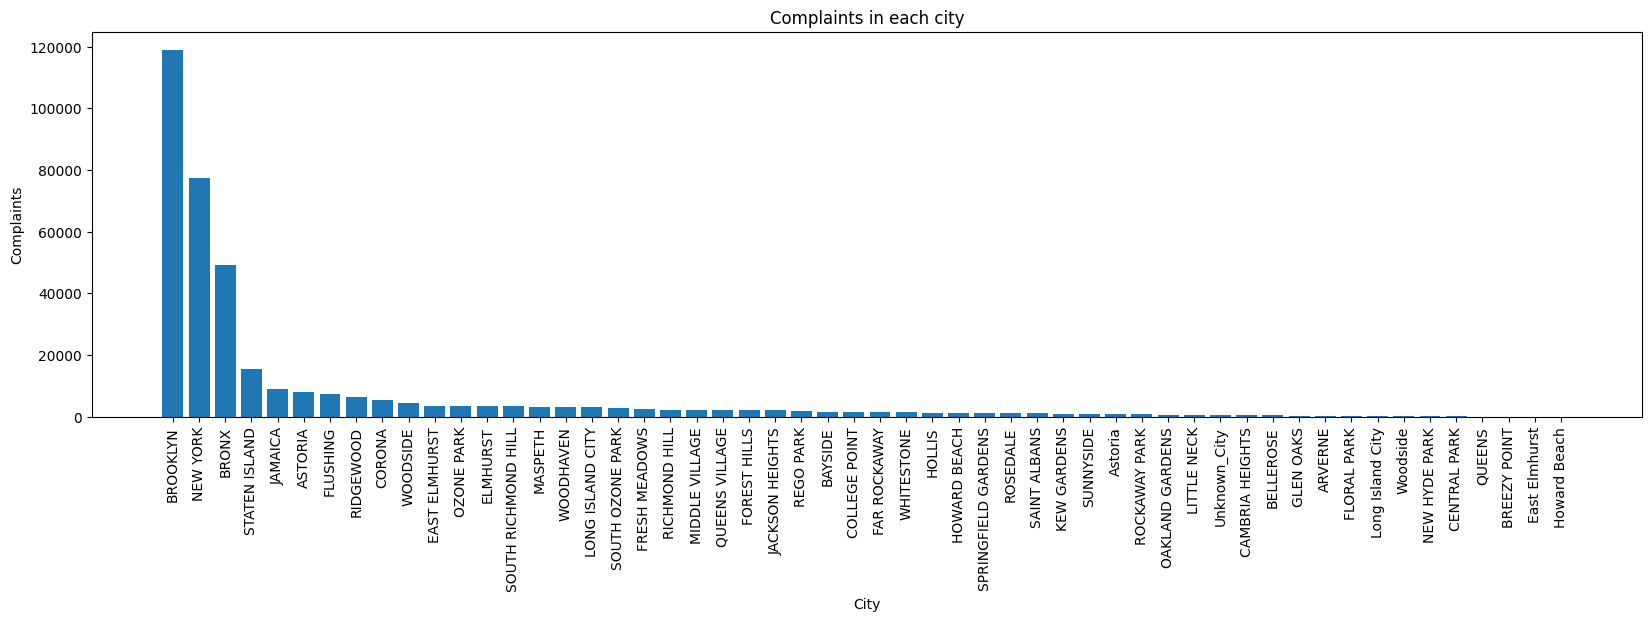

In [20]:
plt.figure(figsize=(20,5)) 

plt.bar(df_modif['City'].value_counts().index, df_modif['City'].value_counts().values)

plt.title('Complaints in each city')
plt.xlabel('City')
plt.ylabel('Complaints')
plt.xticks(rotation = 90)
plt.show()

### 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [21]:
lat_BROOKLYN = df_modif[df_modif['City'] == 'BROOKLYN']['Latitude']
lon_BROOKLYN = df_modif[df_modif['City'] == 'BROOKLYN']['Longitude']

print(lat_BROOKLYN)
print('_________________________________________________________________________')
print(lon_BROOKLYN)

5         40.660823
9         40.623793
13        40.687511
17        40.679154
18        40.616550
            ...    
364539    40.691248
364541    40.713613
364544    40.680352
364545    40.692384
364546    40.646439
Name: Latitude, Length: 118849, dtype: float64
_________________________________________________________________________
5        -73.992568
9        -73.999539
13       -73.874505
17       -73.983430
18       -73.930202
            ...    
364539   -73.984375
364541   -73.956966
364544   -73.974766
364545   -73.904011
364546   -73.981971
Name: Longitude, Length: 118849, dtype: float64


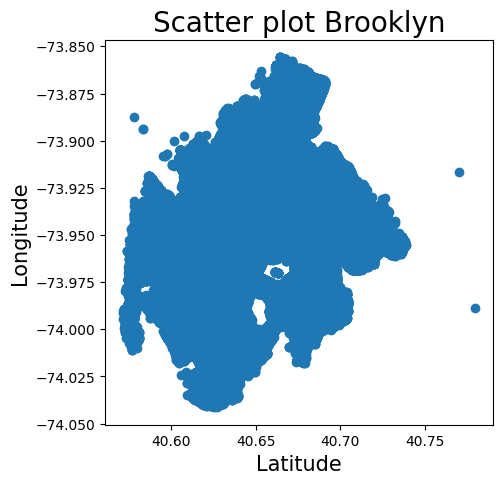

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(lat_BROOKLYN,lon_BROOKLYN)
plt.title('Scatter plot Brooklyn', fontsize = 20)
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Longitude', fontsize = 15)
plt.show()

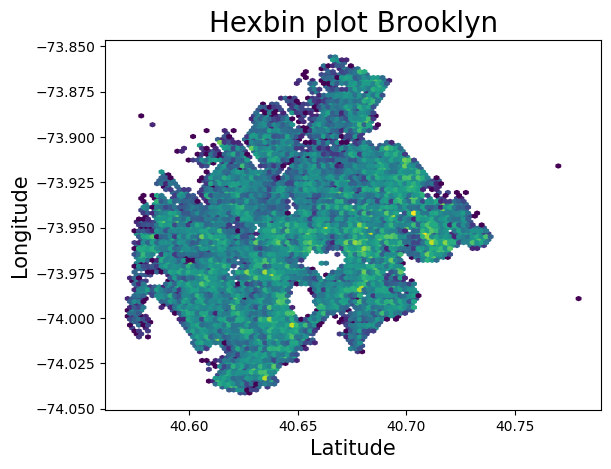

In [23]:
plt.hexbin(lat_BROOKLYN,lon_BROOKLYN,bins='log')
plt.title('Hexbin plot Brooklyn', fontsize = 20)
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Longitude', fontsize = 15)
plt.show()

# 3. Find major types of complaints:

### 3.1 Plot a bar graph to show the types of complaints

In [24]:
df_modif.Complaint_Type.unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [25]:
complaint_Type_list1 = df_modif['Complaint_Type'].value_counts()

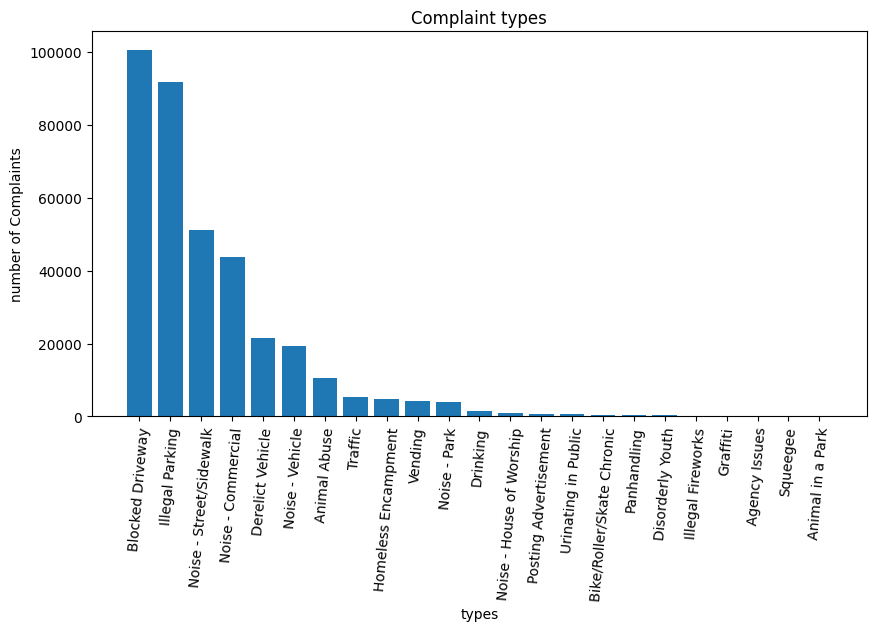

In [26]:
plt.figure(figsize=(10,5)) 
plt.bar(complaint_Type_list1.index,complaint_Type_list1.values)

plt.title('Complaint types')
plt.xlabel('types')
plt.ylabel('number of Complaints')
plt.xticks(rotation = 85)
plt.show()

In [27]:
# pviot table of Complaint_Type - number of Complaint_Type
complaint_Type_list2 = df_modif.pivot_table(columns=['Complaint_Type'],aggfunc='size')

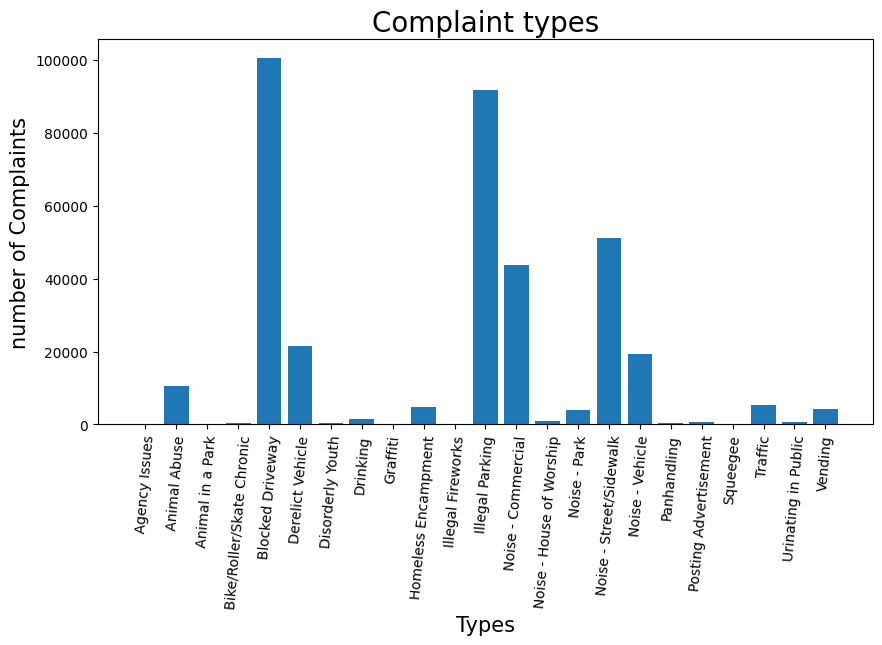

In [28]:
plt.figure(figsize=(10,5)) 
plt.bar(complaint_Type_list2.index,complaint_Type_list2.values)

plt.title('Complaint types', fontsize =20)
plt.xlabel('Types', fontsize = 15)
plt.ylabel('number of Complaints', fontsize = 15)
plt.xticks(rotation = 85)
plt.show()

### 3.2 Check the frequency of various types of complaints for New York City

In [30]:
complaint_in_NewYork = df_modif[df_modif['City']=='NEW YORK']['Complaint_Type'].value_counts()

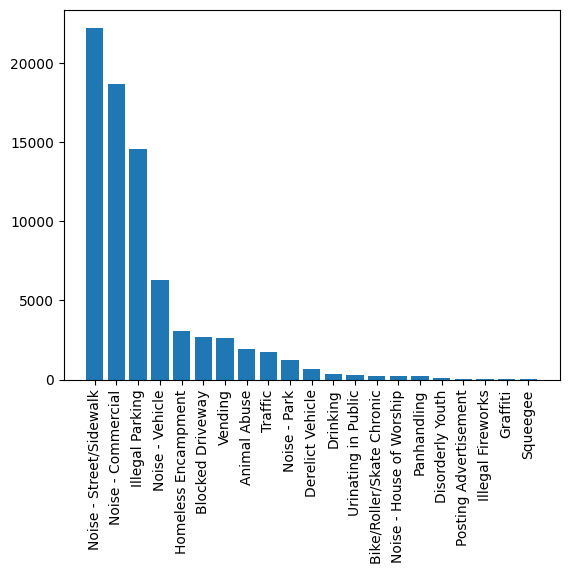

In [31]:
plt.bar(complaint_in_NewYork.index,complaint_in_NewYork.values)
plt.xticks(rotation=90)
plt.show()

### 3.3 Find the top 10 complaint types

In [32]:
# top 10 complaint types
print(df_modif['Complaint_Type'].value_counts()[0:10])

print('_____________________________________________________________________________')

# list of the complaint types
top_10_complaintTypes = df_modif['Complaint_Type'].value_counts().index[0:10]
print(top_10_complaintTypes)

Complaint_Type
Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: count, dtype: int64
_____________________________________________________________________________
Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending'],
      dtype='object', name='Complaint_Type')


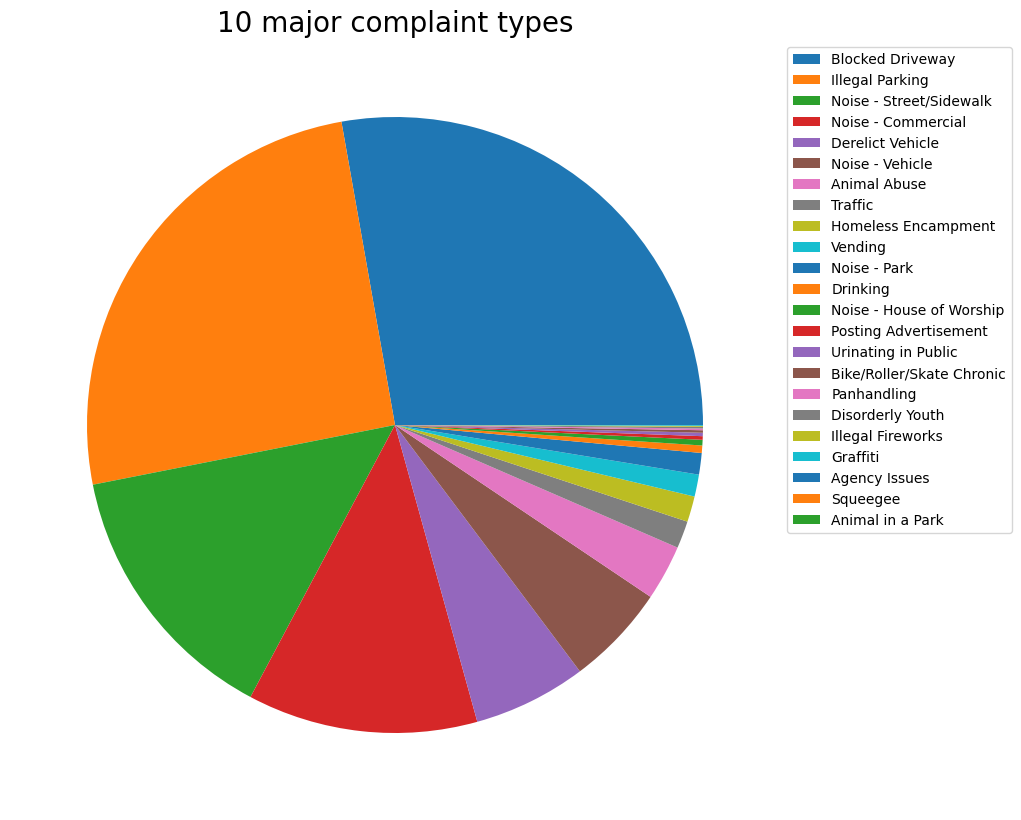

In [36]:
plt.figure(figsize=(10,10))
plt.pie(df_modif['Complaint_Type'].value_counts().values)
plt.legend(labels= df_modif['Complaint_Type'].value_counts().index,
          bbox_to_anchor=(1, 1))
plt.title("10 major complaint types", fontsize=20)
plt.show()

### 3.4 Display the various types of complaints in each city

In [37]:
cities = list(df_modif['City'].unique())

In [38]:
complaint_by_cities = df_modif.groupby('City')['Complaint_Type'].apply(list)
complaint_by_cities


City
ARVERNE                [Illegal Parking, Noise - Commercial, Animal A...
ASTORIA                [Blocked Driveway, Noise - Commercial, Noise -...
Astoria                [Illegal Parking, Illegal Parking, Noise - Str...
BAYSIDE                [Blocked Driveway, Derelict Vehicle, Illegal P...
BELLEROSE              [Derelict Vehicle, Blocked Driveway, Blocked D...
BREEZY POINT           [Noise - Street/Sidewalk, Blocked Driveway, An...
BRONX                  [Blocked Driveway, Illegal Parking, Blocked Dr...
BROOKLYN               [Illegal Parking, Blocked Driveway, Illegal Pa...
CAMBRIA HEIGHTS        [Derelict Vehicle, Derelict Vehicle, Blocked D...
CENTRAL PARK           [Noise - Street/Sidewalk, Noise - Street/Sidew...
COLLEGE POINT          [Illegal Parking, Blocked Driveway, Blocked Dr...
CORONA                 [Blocked Driveway, Blocked Driveway, Blocked D...
EAST ELMHURST          [Noise - House of Worship, Blocked Driveway, B...
ELMHURST               [Illegal Parking, Block

In [39]:

df_new = df_modif.groupby(['City','Complaint_Type']).size().unstack()
df_new.head()

Complaint_Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,1.0,4.0,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3436.0,426.0,5.0,43.0,4.0,32.0,...,21.0,64.0,409.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
Astoria,NaN,NaN,NaN,NaN,159.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,3.0,2.0,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,1.0,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN


<Figure size 2000x1700 with 0 Axes>

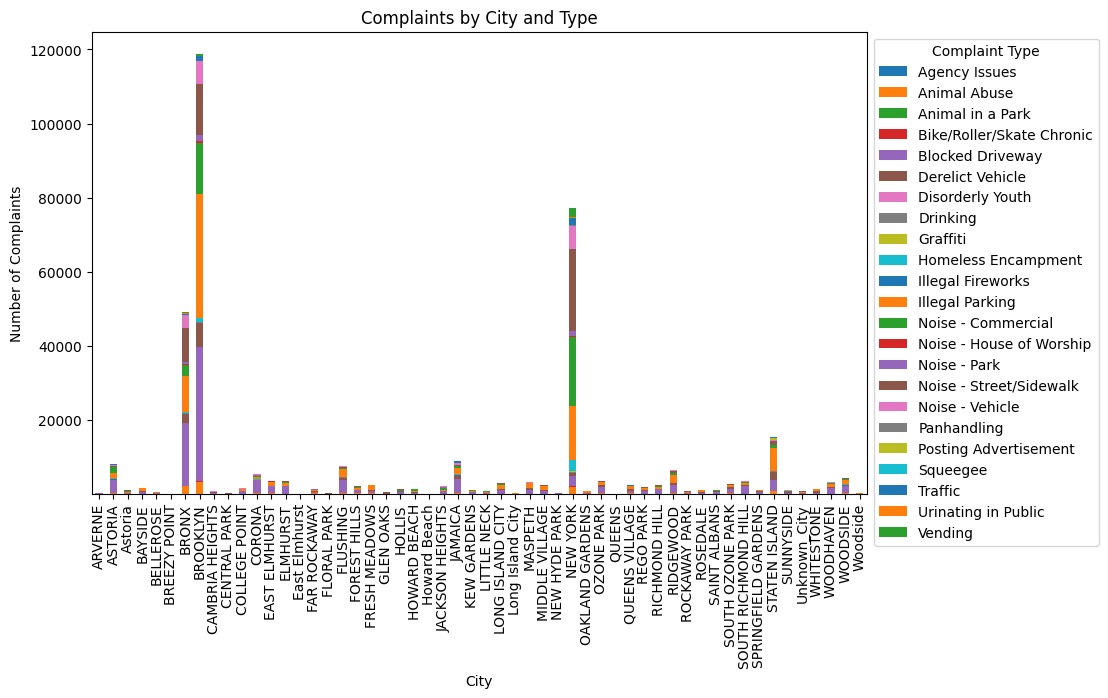

In [40]:
plt.figure(figsize=(20,17))
df_new.plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.bar()
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.title('Complaints by City and Type')
plt.xticks(rotation=90)
plt.legend(title='Complaint Type',  bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()


# Average Request Closing Time

In [72]:
pvt_table_df = df_modif.pivot_table(index='Location_Type', columns='Complaint_Type', values='Time_elapsed', aggfunc='mean')
pvt_table_df.head()

Complaint_Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location_Type,,,,,,,,,,,,,,,,,,,,,
Bridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13767.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club/Bar/Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,15680.577681,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25567.96,NaN
Commercial,16238.990741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Highway,NaN,NaN,NaN,NaN,25371.277778,NaN,NaN,NaN,11429.578947,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11292.568282,NaN,NaN
House and Store,17505.012245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


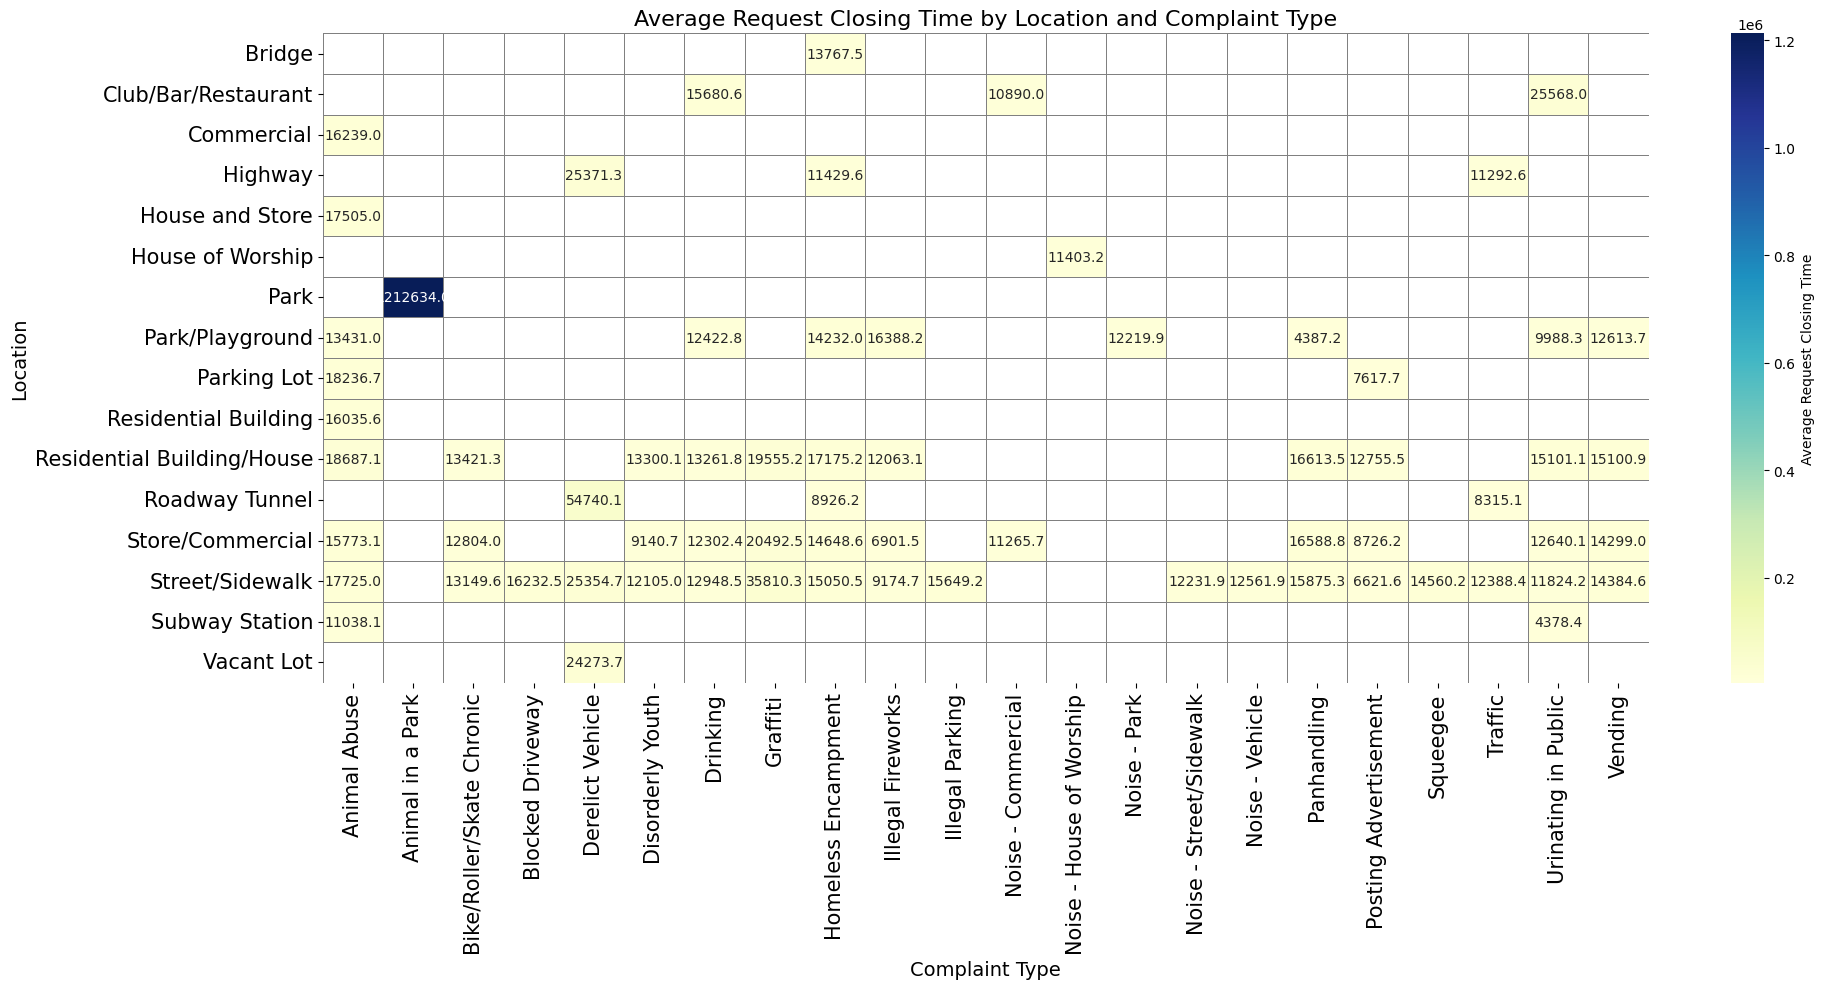

In [73]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(pvt_table_df, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5, linecolor='gray', 
                 cbar_kws={'label': 'Average Request Closing Time'})
ax.set_xlabel('Complaint Type', fontsize=14)
ax.set_ylabel('Location', fontsize=14)
ax.set_title('Average Request Closing Time by Location and Complaint Type', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
plt.tight_layout()
plt.show()

### Average Request Closing Time is highest for 'Animals in a park' at Park

In [44]:
# check categorical variable
df_modif.select_dtypes(include="O")

,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Address,Street_Name,Cross_Street_1,Cross_Street_2,Address_Type,...,School_Number,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,School_Not_Found,Location
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.86568153633767, -73.92350095571744)"
1,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.775945312321085, -73.91509393898605)"
2,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.870324522111424, -73.88852464418646)"
3,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.83599404683083, -73.82837939584206)"
4,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,84-25 85 ROAD,85 ROAD,FOREST PARKWAY,85 STREET,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.69514470265117, -73.86094888534394)"
364554,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,2555 SEDGWICK AVENUE,SEDGWICK AVENUE,BAILEY AVENUE,BEND,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.86782963689454, -73.90717786644662)"
364555,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,508 WEST 139 STREET,WEST 139 STREET,AMSTERDAM AVENUE,HAMILTON PLACE,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.821646626438095, -73.95087342885292)"
364556,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,931 EAST 226 STREET,EAST 226 STREET,BRONXWOOD AVENUE,PAULDING AVENUE,ADDRESS,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,"(40.88636077906953, -73.85329048666742)"


# Statistical testing 

In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [91]:
response_time = df_modif['Time_elapsed']
print(response_time)
print('____________________________________________')

complaint_types = df_modif['Complaint_Type']
print(compaint_types)

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Time_elapsed, Length: 362177, dtype: float64
____________________________________________
Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending',
       'Noise - Park', 'Drinking', 'Noise - House of Worship',
       'Posting Advertisement', 'Urinating in Public',
       'Bike/Roller/Skate Chronic', 'Panhandling', 'Disorderly Youth',
       'Illegal Fireworks', 'Graffiti', 'Agency Issues', 'Squeegee',
       'Ferry Complaint', 'Animal in a Park'],
      dtype='object', name='Complaint_Type')


In [80]:
responceTm_complaintTp_df = pd.DataFrame({'ResponseTime': response_time, 'ComplaintType': complaint_types})
responceTm_complaintTp_df

,ResponseTime,ComplaintType
0,3330.0,Noise - Street/Sidewalk
1,5233.0,Blocked Driveway
2,17494.0,Blocked Driveway
3,27927.0,Illegal Parking
4,12464.0,Illegal Parking
...,...,...
364553,37067.0,Illegal Parking
364554,8434.0,Noise - Vehicle
364555,1143.0,Noise - Street/Sidewalk
364556,9653.0,Blocked Driveway


In [81]:
model = ols('ResponseTime ~ C(ComplaintType)', data=responceTm_complaintTp_df).fit()

In [86]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [87]:
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                        sum_sq        df          F  PR(>F)
C(ComplaintType)  5.354337e+12      22.0  565.26157     0.0
Residual          1.559290e+14  362154.0        NaN     NaN


### p-value is 0.0 < 0.05 

### there is difference in the average response time across different complaints

In [88]:
chi_sqr_complaint_loc_type = pd.crosstab(df_modif['Complaint_Type'],df_modif['Location'])
chi_sqr_complaint_loc_type

Location,"(40.49904035820963, -74.24392674874807)","(40.49913462101514, -74.24348482977875)","(40.49967332981336, -74.2379063249761)","(40.499823835142145, -74.24465233636964)","(40.49994886080869, -74.23740031497493)","(40.49999700116009, -74.23801175120917)","(40.50002168207532, -74.23802262609722)","(40.50004910779944, -74.238033510764)","(40.500053572554975, -74.23720292425104)","(40.50062125381004, -74.24398645134252)",...,"(40.91189405032301, -73.89883482192079)","(40.9120408704267, -73.90039032194788)","(40.91207963534435, -73.90078462189373)","(40.912115567502006, -73.90107762347019)","(40.91214873879165, -73.9013525396225)","(40.91218391108232, -73.90075914042282)","(40.91220586223159, -73.90075187169981)","(40.91234427543014, -73.902133732632)","(40.912827652752576, -73.90250567520697)","(40.912868795316655, -73.90247305278565)"
Complaint_Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,0,0,0,1,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,1,0,0,1,0
Derelict Vehicle,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drinking,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Graffiti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Homeless Encampment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Illegal Fireworks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from scipy import stats

In [90]:
chisq,pval,df,et = stats.chi2_contingency(chi_sqr_complaint_loc_type)
print("Chi_square: {}, pvalue:{}".format(chisq,pval))

Chi_square: 4945145.651450526, pvalue:0.0


### p-value 0.0 < 0.05

### Rejecting null hypothesis. Complaint types and locations are related.